In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
sal=pd.read_csv("Salary_Data.csv")
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
dataset = pd.read_csv("delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
# EDA and data visualization
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


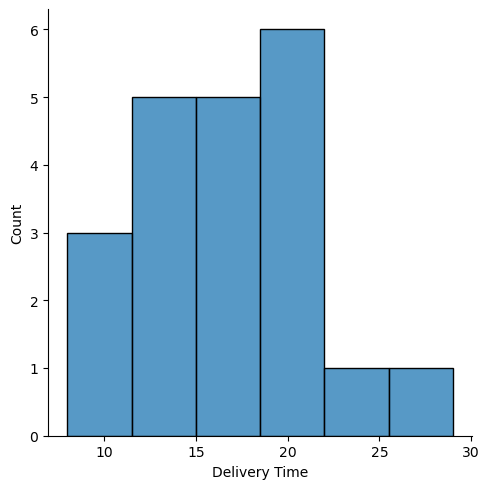

In [7]:
sns.displot(dataset["Delivery Time"])

In [8]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [1]:
#Regressoin analysis
sns.regplot(x=dataset["Sorting Time"],y=dataset["Delivery Time"])
plt.show()

NameError: name 'sns' is not defined

In [14]:
model = smf.ols("delivery_time ~ sorting_time", data=dataset).fit()
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
dataset = dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
#Model prediction for sorting time 5
delivery_time = 6.5+1.6*5
delivery_time

14.5

In [17]:
# prediction for sorting time 5,8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [21]:
# Data Prediction
data_prediction = pd.DataFrame(new_data, columns=['sorting_time'])
data_prediction

,sorting_time
0,5
1,8


In [23]:
model.predict(data_prediction)

0    14.827833
1    19.774893
dtype: float64